### Objective Of this Project:  To analyse the sentiments and categorised the product as positive, negative or neutral.

In [20]:
# importing required libraries
import pandas as pd # for analysing the data
import numpy as np # for mathematical collections on arrays
import matplotlib.pyplot as plt # for plotting
import seaborn as sb # for plotting
import sklearn as skl # for machine learning algorithms

import nltk # natural language toolkit
# snowball represents a ball type in which all similar words like cared, caring etc and 
# stemmer means all words come under a common stem i.e care in this example.
stemmer=nltk.SnowballStemmer(language="english") 

nltk.download("stopwords")
from nltk.corpus import stopwords # corpus means single collection and corpora means multiple collection of data
stopwords=set(stopwords.words("english")) # make a set of particular english words 

import string # used for purpose of cleaning

import re # for regular expression

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###  Get the Data

In [21]:
# Reading the CSV file

data=pd.read_csv("flipkart_data.csv")

### Explore and visualize the data to gain insights

In [22]:
# Showing first 5 rows
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,Awsome sound powerful bass battery backup is a...,5


In [23]:
# get information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  489 non-null    object
 1   rating  489 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB


#### Infer:  The table has 489 entries and all 489 are non-null for both columns.

In [24]:
data.isnull().sum()

review    0
rating    0
dtype: int64

In [25]:
data.describe()

,rating
count,489.000000
mean,4.370143
std,0.921070
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Infer: Average rating is approximately 4.37 and the product is not so bad.

In [26]:
def clean(text):
    text=str(text).lower()
    text=re.sub("https://\S+ | www\.\S+", "", text)
    text=re.sub("<.*>", "", text)
    text=re.sub('\n', "", text)
    text=re.sub("\w*\d\w*", "", text)
    text=text.translate(str.maketrans('','',string.punctuation))  # 1st parameter represents what need to be replaced, 2nd parameter represents what need to be placed instead of replaced word, and 3rd parameter represents what need to be deleted
    text=[stemmer.stem(word) for word in text.split(" ") if word not in stopwords]
    text=" ".join(text)
    return text
    

In [27]:
data['review']=data['review'].apply(clean)

In [28]:
data

,review,rating
0,nice produt like design lot easi carri look...,5
1,awesom soundveri pretti see nd sound qualiti g...,5
2,awesom sound qualiti pros hrs batteri life in...,4
3,think good product per qualiti also design qui...,5
4,awsom sound power bass batteri backup also exc...,5
...,...,...
484,right left distribut okayotherwis sound qualit...,4
485,nice bluetooth headphon pleas perform day use...,5
486,excel sound qualiti deep bass good batteri bac...,5
487,good product boat headphon good best also nice...,5


In [29]:
# Data Visualisation
ratings=data['rating'].value_counts()
categories=ratings.index
quantities=ratings.values

import plotly.express as px
figure=px.pie(data, 
             values=quantities,
             names=categories)

figure.show()

#### Infer: approx 60 percent ratings flipkart got for that particular product is 5.

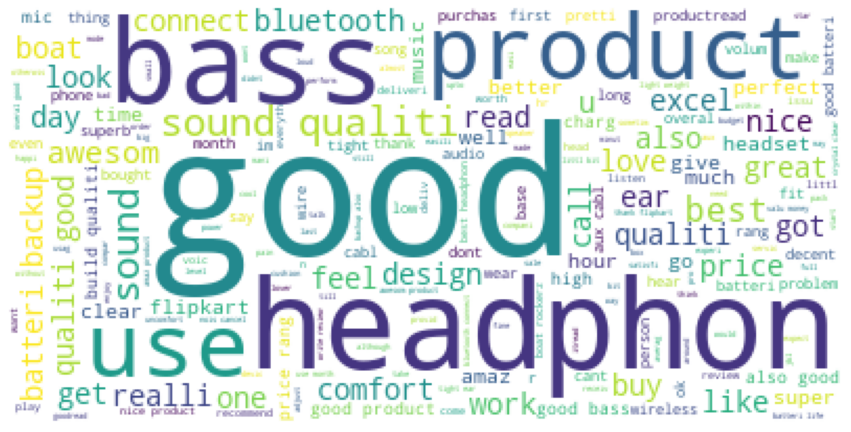

In [30]:
text=" ".join(i for i in data.review)
wordcloud= WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.figure(figsize=(15, 20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [32]:
# Analysing the scores of reviews to be positive, negative and neutral

nltk.download('vader_lexicon')
sentiment=SentimentIntensityAnalyzer()

data['Positive']=[sentiment.polarity_scores(i)['pos'] for i in data.review]
data['Negative']=[sentiment.polarity_scores(i)['neg'] for i in data.review]
data['Neutral']=[sentiment.polarity_scores(i)['neu'] for i in data.review]
data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...


,review,rating,Positive,Negative,Neutral
0,nice produt like design lot easi carri look...,5,0.431,0.000,0.569
1,awesom soundveri pretti see nd sound qualiti g...,5,0.471,0.000,0.529
2,awesom sound qualiti pros hrs batteri life in...,4,0.194,0.000,0.806
3,think good product per qualiti also design qui...,5,0.393,0.049,0.558
4,awsom sound power bass batteri backup also exc...,5,0.479,0.029,0.492


In [38]:
x= sum(data['Positive'])
y= sum(data['Negative'])
z= sum(data['Neutral'])

In [39]:

def max_sentiment_score(x, y, z):
    if(x>y and x>z):
        return 'Positive'
    elif (y>x and y>z):
        return 'Negative'
    else:
        return 'Neutral'
    
max_sentiment_score(x, y, z)

'Neutral'

In [ ]:
# 4. Prepare the data for Machine Learning algorithms
# 5. Select a model and train it
# 6. Fine-tune your model
# 7. Present your solution
# 8. Deployment- Launch, monitor and maintain your system

References: 
    
    https://www.slideshare.net/Countants/how-does-customer-feedback-sentiment-analysis-work-in-search-marketing
        